In [5]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

### Траектория объекта в постоянном поле гравитации

Основная система уравнений:

\begin{align}
\begin{cases}
\frac{dV_x}{dt} = 0 \\
\frac{dV_y}{dt} = -g
\end{cases}
\end{align}

Начальные условия:

\begin{align}
\begin{cases}
\vec{V} = \vec{V_0}\\
x = x_0 , \; \; y=y_0
\end{cases}
\end{align}

Мы знаем аналитическое решение этого уравнения:

$$
  x = x_0+V_{0x}t, \\ y=y_0+V_{0y}t-\frac{gt^2}{2}
$$

Теперь попробуем решить систему численно и сравнить результат

In [318]:
def explicit_euiler(f, u_prev, dt):
    # Your code here
    pass

In [319]:
theta = np.pi/3
u = 5.
v0 = [u*np.cos(theta), u*np.sin(theta)] # m/s
g = 9.81 # m/s^2
T_end = v0[1]/g*2

f = lambda v : np.array([0, -g])

In [320]:
Nt = 20

t = np.linspace(0, T_end, Nt+1)
r = np.zeros((Nt, 2))
v = np.zeros((Nt, 2))
v[0] = v0

for i in range(1, Nt):
  dt = (t[i]-t[i-1])+0.
  v[i] = explicit_euiler(f, v[i-1], dt)
  r[i] = r[i-1] + v[i] * dt

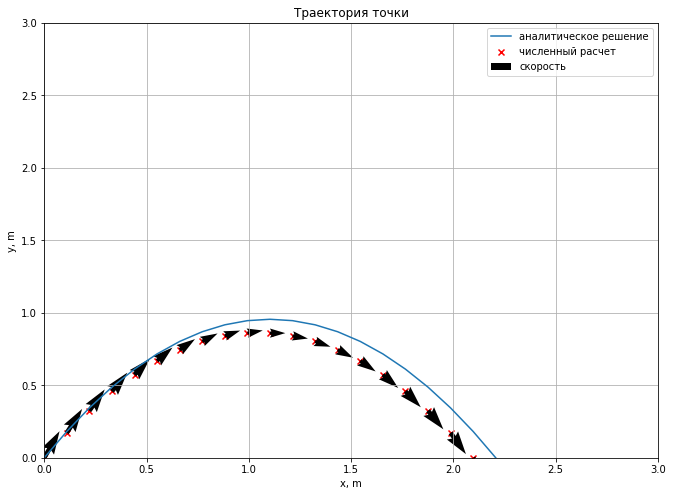

In [321]:
plt.subplots(figsize= (11, 8))
plt.title('Траектория точки')
plt.xlabel('x, m')
plt.ylabel('y, m')
plt.grid()
plt.scatter(r[:, 0], r[:, 1], label='численный расчет', marker='x', color='r')
plt.plot(v0[0]*t, v0[1]*t-g*t**2/2, label='аналитическое решение')
plt.ylim(0, 3)
plt.xlim(0, 3)
plt.quiver(*r.T, v[:, 0], v[:, 1], scale=1e2, label='скорость')
plt.legend()
plt.show()

## Выбор метода на примере модельной задачи

Попробуем решить модельное уравнение на отрезке [0, $2\pi$]

\begin{cases}
  y' = - y \sin (x) \\
  y(0) = 1
\end{cases}

Его аналитическое решение:

$$
  y = e^{\cos (x)-1}+1
$$

In [2]:
def explicit_euiler(f, y_prev, x_prev, h):
    # Your code here
    pass

In [14]:
y0 = 1
f = lambda y, x : -y*np.sin(x)

In [39]:
Nx = 21

x = np.linspace(0, 2*np.pi, Nx)
y = np.zeros(Nx)
y[0] = y0

for i in range(1, Nx):
  h = (x[i]-x[i-1])+0.
  y[i] = explicit_euiler(f, y[i-1], x[i-1], h)

Nx2 = 101

x2 = np.linspace(0, 2*np.pi, Nx2)
y2 = np.zeros(Nx2)
y2[0] = y0

for i in range(1, Nx2):
  h2 = (x2[i]-x2[i-1])+0.
  y2[i] = explicit_euiler(f, y2[i-1], x2[i-1], h2)

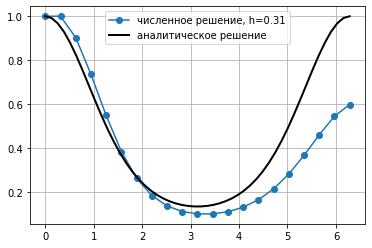

In [40]:
plt.plot(x, y, marker='o', label='численное решение, h={:.2f}'.format(h))
#plt.plot(x2, y2, marker='o', label='численное решение, h={:.2f}'.format(h2))

x_an = np.linspace(0, 2*np.pi)
y_an = np.exp(np.cos(x_an)-1)

plt.plot(x_an, y_an, label='аналитическое решение', color='k', linewidth=2)
plt.legend()
plt.grid()
plt.show()

In [41]:
def explicit_mod_euiler(f, y_prev, x_prev, h):
    # Your code here
    pass

In [44]:
x_mod = np.linspace(0, 2*np.pi, Nx)
y_mod = np.zeros(Nx)
y_mod[0] = y0

for i in range(1, Nx):
  h = (x_mod[i]-x_mod[i-1])+0.
  y_mod[i] = explicit_mod_euiler(f, y_mod[i-1], x_mod[i-1], h)

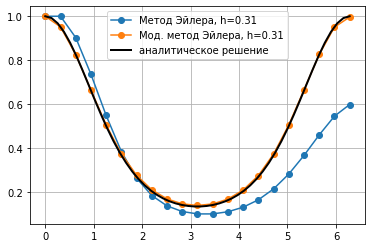

In [45]:
plt.plot(x, y, marker='o', label='Метод Эйлера, h={:.2f}'.format(h))
plt.plot(x_mod, y_mod, marker='o', label='Мод. метод Эйлера, h={:.2f}'.format(h))
#plt.plot(x2, y2, marker='o', label='численное решение, h={:.2f}'.format(h2))

x_an = np.linspace(0, 2*np.pi)
y_an = np.exp(np.cos(x_an)-1)

plt.plot(x_an, y_an, label='аналитическое решение', color='k', linewidth=2)
plt.legend()
plt.grid()
plt.show()

## Устойчивость алгоритма

In [60]:
f = lambda x, y: y*np.exp(x)
x0 = 1.
y0 = 1.

In [65]:
Nx = 11

x = np.linspace(x0, 2, Nx)
y = np.zeros(Nx)
y[0] = y0

for i in range(1, Nx):
  h = (x[i]-x[i-1])+0.
  y[i] = explicit_euiler(f, y[i-1], x[i-1], h)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


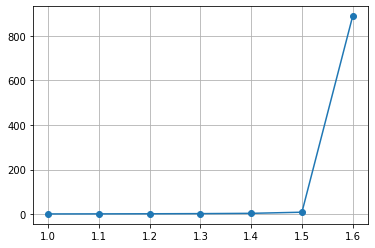

In [67]:
plt.plot(x, y, marker='o')
plt.grid()
plt.show()

In [74]:
def implicit_euiler(y_prev, x_prev, h):
    # Your code here
    pass

In [75]:
Nx = 11

x = np.linspace(x0, 2, Nx)
y = np.zeros(Nx)
y[0] = y0

for i in range(1, Nx):
  h = (x[i]-x[i-1])+0.
  y[i] = implicit_euiler(y[i-1], x[i-1], h)

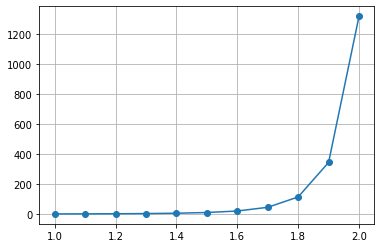

In [76]:
plt.plot(x, y, marker='o')
plt.grid()
plt.show()

## Колебания маятника

Решим следующую систему уравнений:
$$
  \theta''(t) = -\mu \theta'(t) - \frac{g}{L} \sin(\theta(t))
$$

Известно решение для колебаний маятника с малым углом отклонения (вспомните формулу для периода)

Для начала приведем уравнение второго порядка к системе уравнений первого порядка:

$$
\theta = x \\
\theta' = y
$$

Тогда иммем:

\begin{cases}
x' = y \\
y' = -\mu y - \frac{g}{L} \sin (x)
\end{cases}


In [322]:
def explicit_euiler(f, u_prev, dt):
      # Your code here
    pass

def explicit_mod_euiler(f, u_prev, dt):
      # Your code here
    pass

def implicit_euiler(f, J, u_prev, dt):
       # Your code here
    pass

def implicit_mod_euiler(f, J, u_prev, dt):
        # Your code here
    pass

In [323]:
g = 9.81
L = 10
mu = 0.0

f = lambda u : np.array([ u[1], -mu*u[1] - g/L*np.sin(u[0]) ])
J = lambda u : np.array( [ [0, 1], [ - g/L * np.cos(u[0]) , -mu] ] )
u_0 = [np.pi/6, 0]

T_end = 5 * 2 * np.pi * np.sqrt(L/g)

In [324]:
dt = 1e-1 # s
Nt = round(T_end / dt)

t = np.linspace(0, T_end, Nt+1)
u = np.zeros((Nt+1, 2))
u[0] = u_0

for i in range(1, Nt+1):
  dt = (t[i]-t[i-1])
  u[i] = explicit_euiler(f, u[i-1], dt)

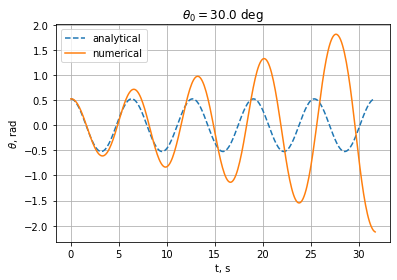

In [325]:
plt.grid()
plt.title(r'$\theta_0 =$'+'{} deg'.format(u_0[0]/np.pi*180))
plt.xlabel('x')
plt.ylabel('y')

omega = 1 / np.sqrt(L/g)
plt.xlabel('t, s')
plt.ylabel(r'$\theta$, rad')
plt.plot(t, u_0[0]*np.cos(omega*t), label='analytical', linestyle='--')
plt.plot(t, u[:, 0], label='numerical')
plt.legend()
plt.show()

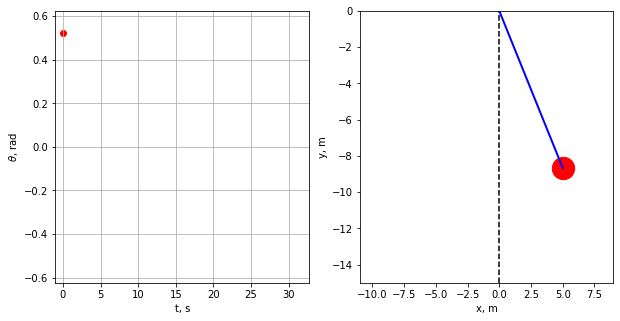

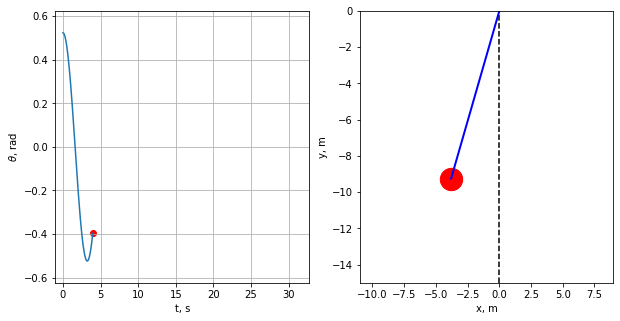

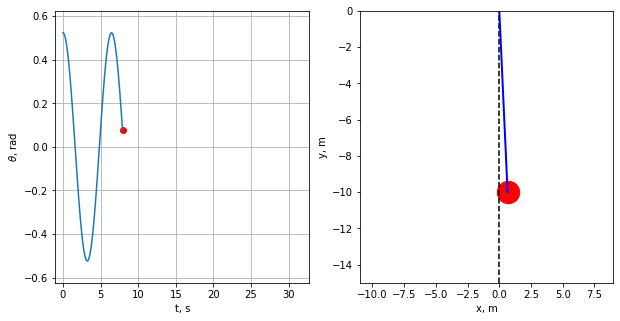

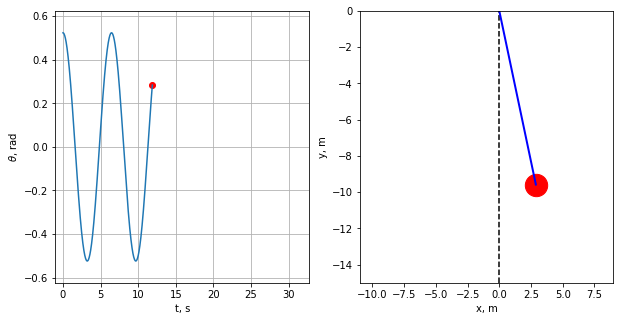

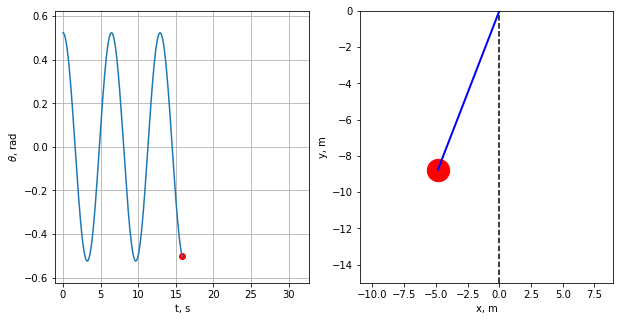

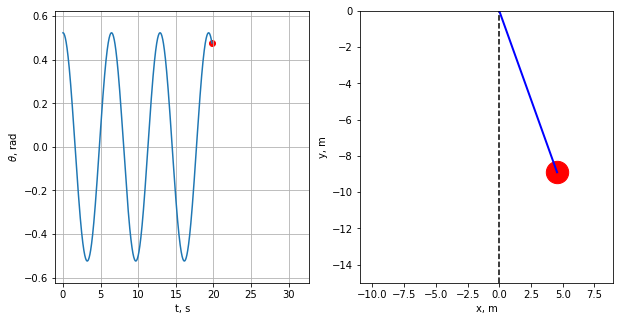

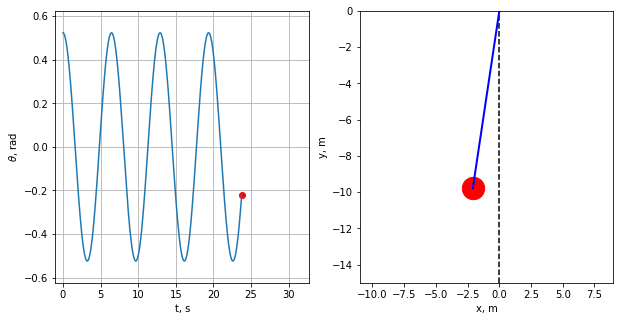

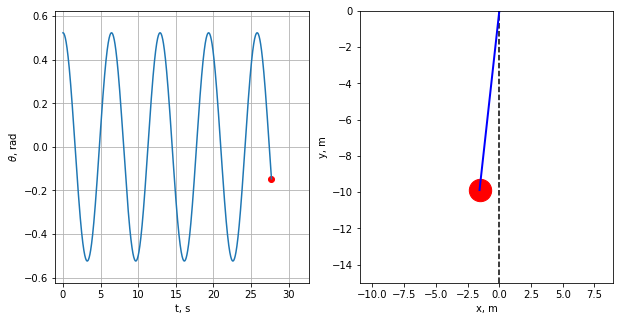

In [285]:
N_plot = 8
step = Nt//N_plot

for i in range(N_plot):
    n_end = (i) * step+1
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(t[:n_end], u[:n_end, 0])
    ax[0].scatter(t[n_end-1], u[n_end-1, 0], color='r')
    ax[0].set_xlabel('t, s')
    ax[0].set_ylabel(r'$\theta$, rad')
    ax[0].set_xlim(-1, T_end+1)
    ax[0].set_ylim(-u_0[0]-0.1, u_0[0]+0.1)
    ax[0].grid()

    theta = u[n_end, 0]
    x = L * np.sin(theta)
    y = -L * np.cos(theta)

    ax[1].set_xlabel('x, m')
    ax[1].set_ylabel('y, m')
    ax[1].set_xlim(-L-1, L-1)
    ax[1].set_ylim(-L-5, 0)
    ax[1].axvline(0, linestyle='--', color='k')

    ax[1].plot([0, x], [0, y], linewidth = 2, color='b');
    ax[1].scatter(x, y, s=500, color='r')